In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

from keras.models import Sequential
from keras.layers import Conv2D, Lambda, MaxPooling2D
from keras.layers import Dense, Dropout, Flatten

from keras.layers.normalization import BatchNormalization

from keras.preprocessing.image import ImageDataGenerator

from keras.utils.np_utils import to_categorical

Using TensorFlow backend.


In [2]:
train = pd.read_csv("./train.csv")

In [3]:
test = pd.read_csv("./test.csv")

In [4]:
print("Training data size: " + str(train.shape))

Training data size: (42000, 785)


In [5]:
print("Testing data size: " + str(test.shape))

Testing data size: (28000, 784)


In [8]:
X = train.values[:, 1:]
y = train["label"].values

test_x = test.values

In [9]:
X = X/255.0
test_x = test_x/255.0

In [10]:
X = X.reshape(-1, 28, 28, 1)
test_x = test_x.reshape(-1, 28, 28, 1)

In [12]:
# label encoding
y = to_categorical(y)

print("label size :" + str(y.shape))

label size :(42000, 10)


In [13]:
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [14]:
X_train.shape, X_test.shape, Y_train.shape, Y_test.shape

((33600, 28, 28, 1), (8400, 28, 28, 1), (33600, 10), (8400, 10))

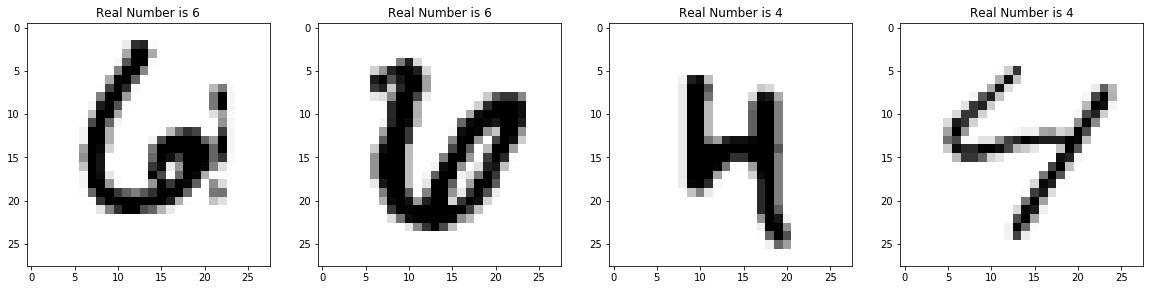

In [17]:
# data visualization
X_train__ = X_train.reshape(X_train.shape[0], 28, 28)

fig, axis = plt.subplots(1, 4, figsize=(20, 10))
for i, ax in enumerate(axis.flat):
    ax.imshow(X_train__[i], cmap='binary')
    digit = Y_train[i].argmax()
    ax.set(title='Real Number is %s' %digit)

In [18]:
# Normalization
mean = np.mean(X_train)

In [19]:
std = np.std(X_train)

In [20]:
def standardize(x):
    return (x-mean)/std

In [21]:
epochs = 60
batch_size = 64

In [25]:
model = Sequential()

model.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu', input_shape=(28, 28, 1)))
model.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu'))

model.add(MaxPooling2D(pool_size=(2,2)))
model.add(BatchNormalization())

model.add(Conv2D(filters=128, kernel_size=(3,3), activation='relu'))
model.add(Conv2D(filters=128, kernel_size=(3,3), activation='relu'))

model.add(MaxPooling2D(pool_size=(2,2)))
model.add(BatchNormalization())

model.add(Conv2D(filters=256, kernel_size=(3,3), activation='relu'))

model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())

model.add(BatchNormalization())

model.add(Dense(512, activation='relu'))

model.add(Dense(10, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
          

In [28]:
datagen = ImageDataGenerator(
    featurewise_center=False,
    samplewise_center=False,
    featurewise_std_normalization=False,
    samplewise_std_normalization=False,
    zca_whitening=False,
    rotation_range=10,
    zoom_range=0.1,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=False,
    vertical_flip=False)

In [30]:
train_gen = datagen.flow(X_train, Y_train, batch_size=batch_size)
test_gen = datagen.flow(X_test, Y_test, batch_size=batch_size)

In [31]:
# Model Training
history = model.fit_generator(train_gen, 
                epochs=epochs, 
                steps_per_epoch=X_train.shape[0]//batch_size,
                validation_data=test_gen,
                validation_steps=X_test.shape[0]//batch_size)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Epoch 1/60
525/525 [==============================] - 117s 222ms/step - loss: 0.1632 - acc: 0.9481 - val_loss: 0.0939 - val_acc: 0.9716
Epoch 2/60
525/525 [==============================] - 113s 216ms/step - loss: 0.0690 - acc: 0.9790 - val_loss: 0.0816 - val_acc: 0.9767
Epoch 3/60
525/525 [==============================] - 102s 194ms/step - loss: 0.0602 - acc: 0.9817 - val_loss: 0.0569 - val_acc: 0.9826
Epoch 4/60
525/525 [==============================] - 103s 196ms/step - loss: 0.0487 - acc: 0.9854 - val_loss: 0.0519 - val_acc: 0.9856
Epoch 5/60
525/525 [==============================] - 104s 199ms/step - loss: 0.0480 - acc: 0.9855 - val_loss: 0.0585 - val_acc: 0.9821
Epoch 6/60
525/525 [==============================] - 672s 1s/step - loss: 0.0412 - acc: 0.9877 - val_loss: 0.0485 - val_acc: 0.9864
Epoch 7/60
525/525 [==============================] - 2384s 5s/step - loss: 0.0383 - acc: 0.9

In [41]:
model.save("./models/model_keras1.h5")

In [42]:
pred = model.predict_classes(test_x, verbose=1)

28000/28000 [==============================] - 36s 1ms/step


In [50]:
sub = pd.read_csv('./data/sample_submission.csv')
sub['Label'] = pred
sub.to_csv("./results/CNN_keras_sub3.csv", index=False)
sub.head(5)

,ImageId,Label
0,1,2
1,2,0
2,3,9
3,4,0
4,5,3


In [44]:
res = pd.read_csv('./result.csv')

In [45]:
res.head(5)

,ImageId,Label
0,1,2
1,2,0
2,3,9
3,4,9
4,5,3


In [51]:
print("sub shape is: " + str(sub.shape))

sub shape is: (28000, 2)


In [49]:
print('res shape is: ' + str(res.shape))

res shape is: (28000, 2)
